In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Real_estate.csv")

In [3]:
df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


In [4]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [5]:
df = df.rename(
    columns={
        'X1 transaction date': 'date',
        'X2 house age': 'age',
        'X3 distance to the nearest MRT station': 'distance',
        'X4 number of convenience stores': 'stores',
        'X5 latitude': 'latitude',
        'X6 longitude': 'longitude',
        'Y house price of unit area': 'price'
    })

In [6]:
df.head(5)

,No,date,age,distance,stores,latitude,longitude,price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         414 non-null    int64  
 1   date       414 non-null    float64
 2   age        414 non-null    float64
 3   distance   414 non-null    float64
 4   stores     414 non-null    int64  
 5   latitude   414 non-null    float64
 6   longitude  414 non-null    float64
 7   price      414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
df.describe()

,No,date,age,distance,stores,latitude,longitude,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         No   date    age  distance  stores  latitude  longitude  price
0    False  False  False     False   False     False      False  False
1    False  False  False     False   False     False      False  False
2    False  False  False     False   False     False      False  False
3    False  False  False     False   False     False      False  False
4    False  False  False     False   False     False      False  False
..     ...    ...    ...       ...     ...       ...        ...    ...
409  False  False  False     False   False     False      False  False
410  False  False  False     False   False     False      False  False
411  False  False  False     False   False     False      False  False
412  False  False  False     False   False     False      False  False
413  False  False  False     False   False     False      False  False

[414 rows x 8 columns]>

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool

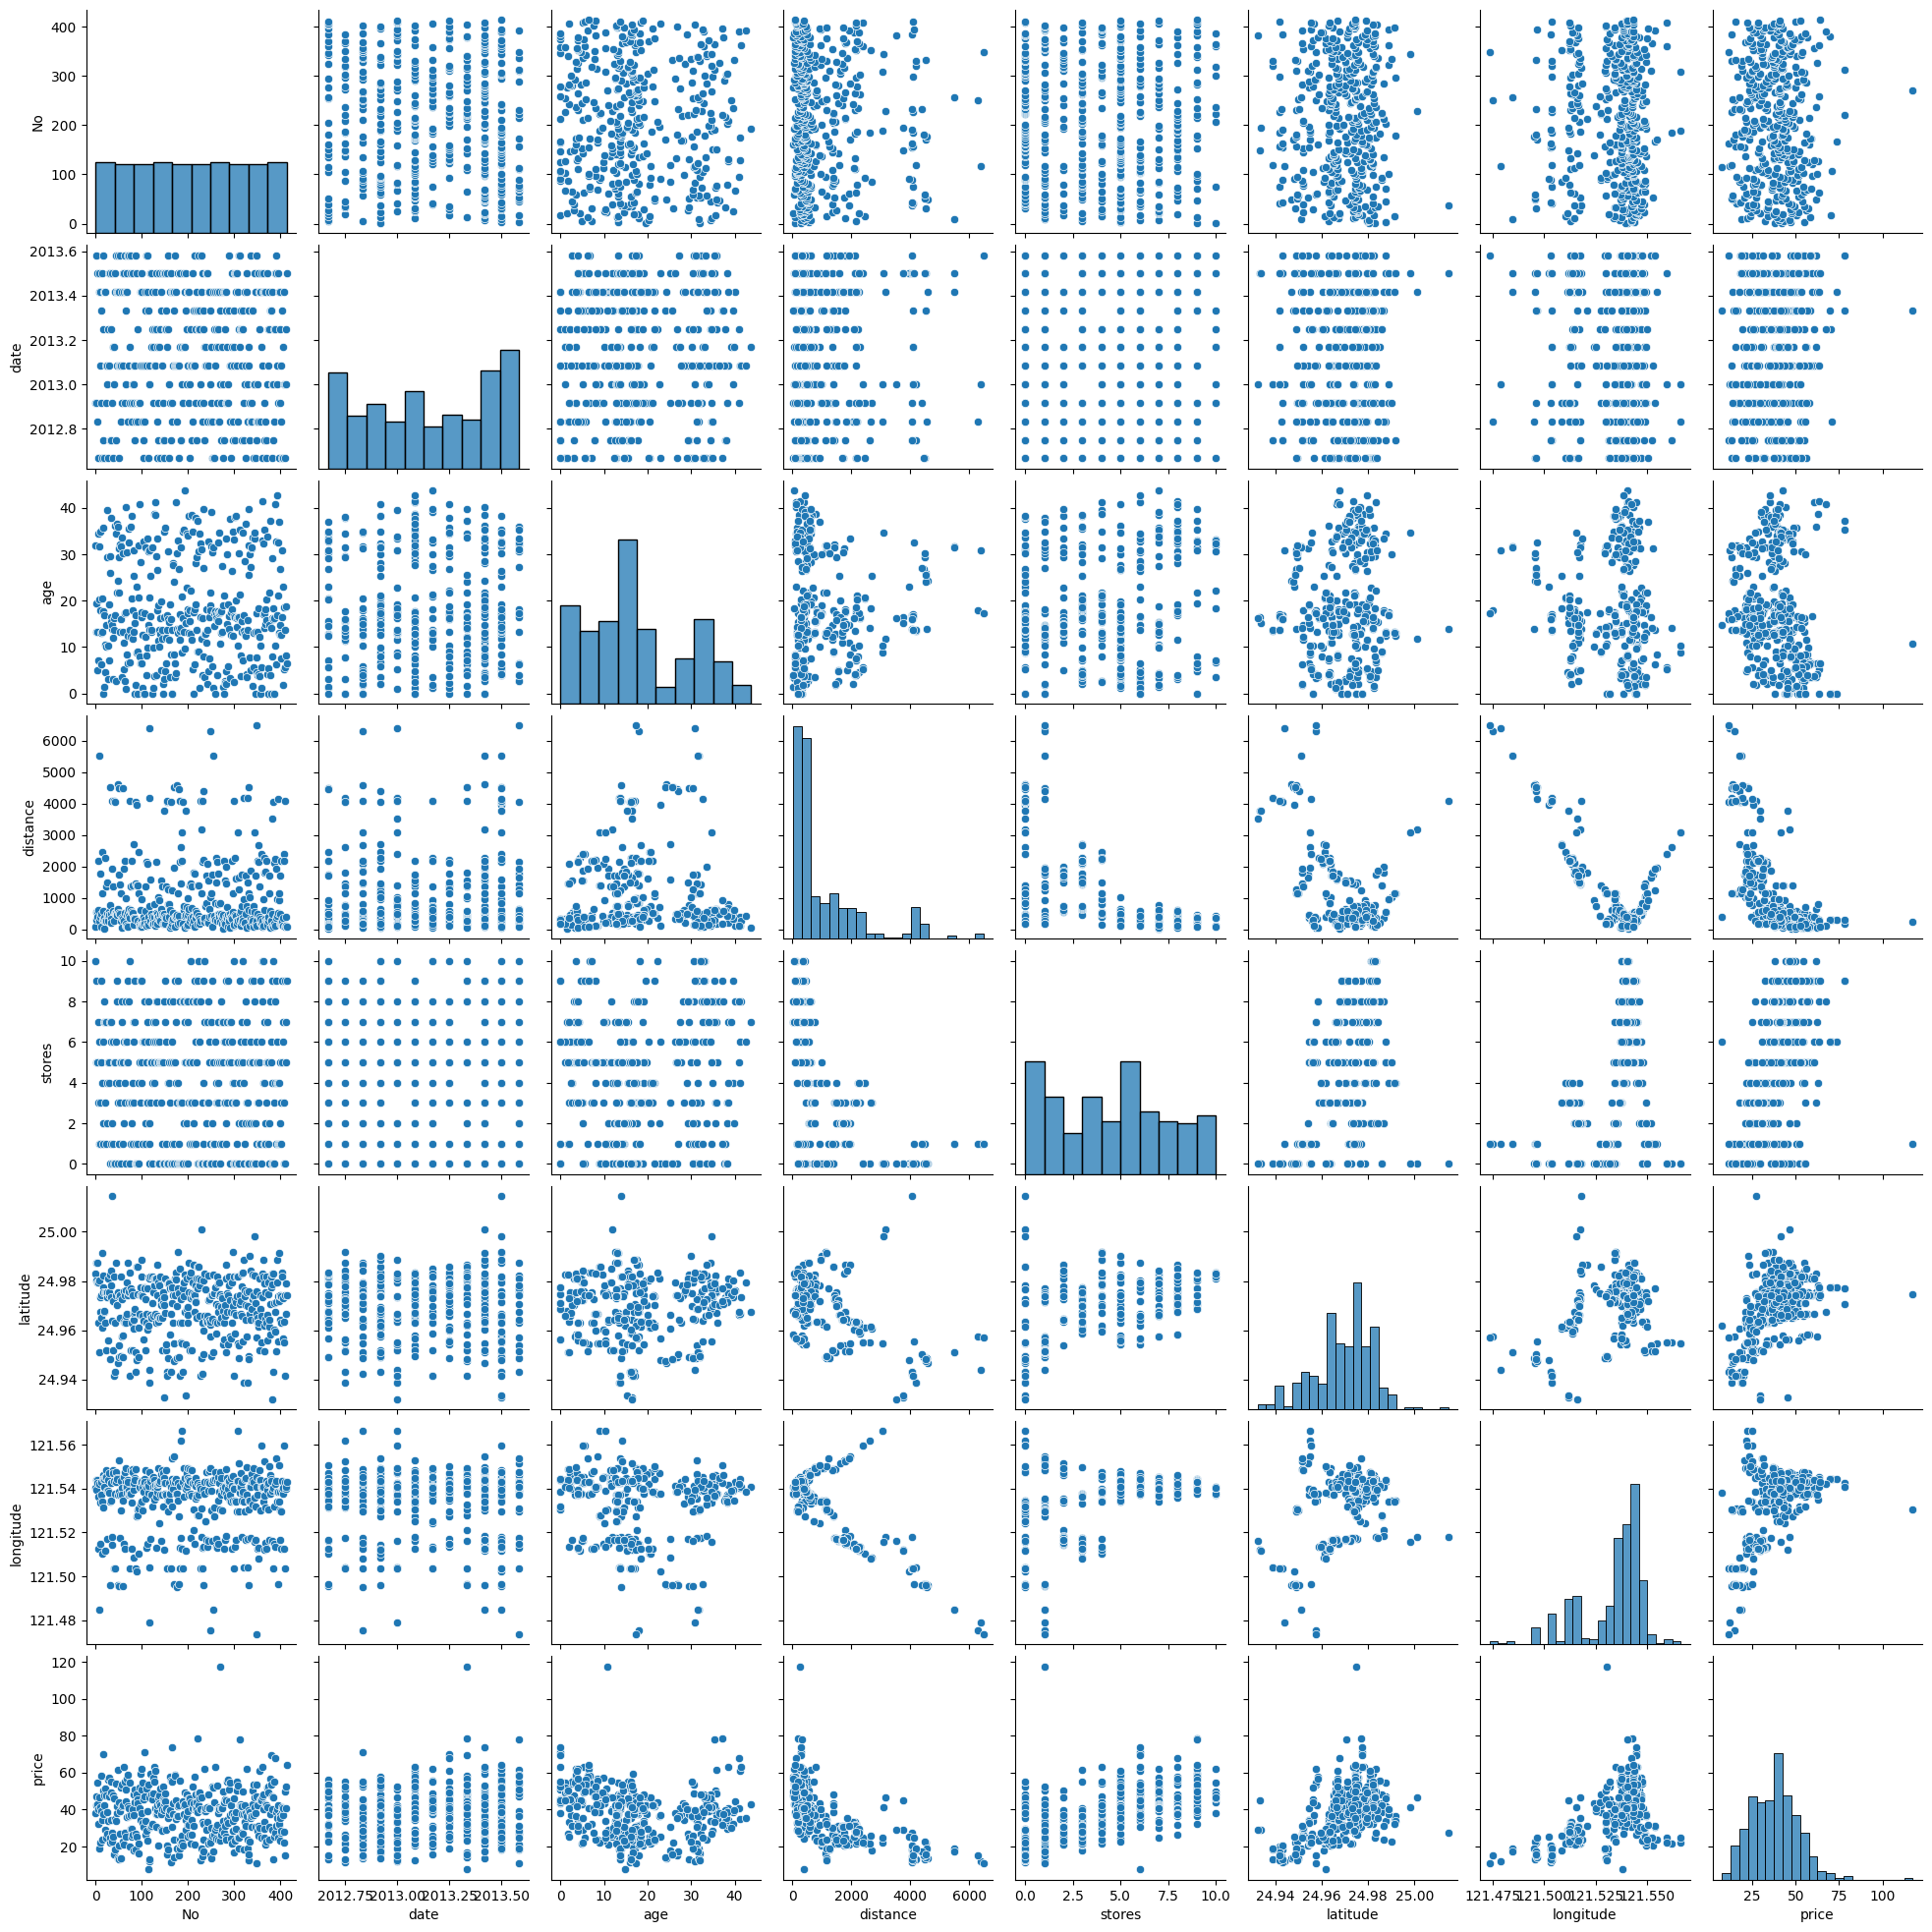

In [11]:
sns.pairplot(df)

In [60]:
df1 = df.copy()
df2 = df.copy()

In [13]:
x = df1[['date', 'age', 'distance', 'stores', 'latitude', 'longitude']] 
x.head(3)

,date,age,distance,stores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391


In [14]:
y = df1['price']
y.head(3) 

0    37.9
1    42.2
2    47.3
Name: price, dtype: float64

# Splitting the datasets into training sets and Test sets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size=30,
                                                random_state=42)

In [17]:
print("xtrain:\n ", xtrain.head(5))
print("\n")
print("xtest: \n", xtest.head(5))

xtrain:
           date   age   distance  stores  latitude  longitude
30   2013.500  25.9  4519.6900       0  24.94826  121.49587
141  2013.333   5.1  1559.8270       3  24.97213  121.51627
104  2012.667  32.7   392.4459       6  24.96398  121.54250
79   2013.000  18.0  1414.8370       1  24.95182  121.54887
33   2013.250  16.5   323.6550       6  24.97841  121.54281


xtest: 
          date   age   distance  stores  latitude  longitude
358  2013.167   1.1   193.5845       6  24.96571  121.54089
350  2013.000  13.2   492.2313       5  24.96515  121.53737
373  2013.083   0.0   274.0144       1  24.97480  121.53059
399  2012.917  12.7   170.1289       1  24.97371  121.52984
369  2012.667  20.2  2185.1280       3  24.96322  121.51237


In [18]:
xtrain.shape

(384, 6)

In [19]:
xtest.shape

(30, 6)

# Standardize the feature columns (X1 to X6) using Z-score scaling

In [20]:
standardize = ['date', 'age', 'distance', 'stores', 'latitude', 'longitude']

for col in standardize:
    mean = xtrain[col].mean()
    std = xtrain[col].std()
    xtrain[col] = (xtrain[col] - mean) / std

xtrain.head(5)

,date,age,distance,stores,latitude,longitude
30,1.229074,0.723091,2.765899,-1.392068,-1.686162,-2.485551
141,0.637534,-1.113832,0.389599,-0.380932,0.235977,-1.147490
104,-1.721545,1.323623,-0.547624,0.630205,-0.420304,0.572968
79,-0.542006,0.025413,0.273195,-1.055022,-1.399492,0.990785
33,0.343534,-0.107057,-0.602852,0.630205,0.741676,0.593302


In [21]:
standardize = ['date','age', 'distance', 'stores', 'latitude', 'longitude']

for col in standardize:
    mean = xtest[col].mean()
    std = xtest[col].std()
    xtest[col] = (xtest[col] - mean) / std

xtest.head(5)

,date,age,distance,stores,latitude,longitude
358,0.252072,-1.334576,-0.683977,0.890214,-0.093553,0.795171
350,-0.351022,-0.362758,-0.481685,0.514067,-0.139070,0.574662
373,-0.051281,-1.422923,-0.629497,-0.990520,0.645280,0.149930
399,-0.650764,-0.402916,-0.699865,-0.990520,0.556685,0.102946
369,-1.553599,0.199450,0.665019,-0.238226,-0.295940,-0.991458


In [22]:
#standardize = ['date', 'age', 'distance', 'stores', 'latitude', 'longitude']

#for col in standardize:
#    mean = x2[col].mean()
#    std = x2[col].std()
#    x2[col] = (x2[col] - mean) / std

#x2.head()

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [24]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [26]:
slopes = lr.coef_
slopes

array([ 1.57089986, -3.07751067, -5.98971608,  3.19678181,  2.68896635,
       -0.3936824 ])

In [27]:
intercept = lr.intercept_
intercept

38.07369791666565

In [28]:
#Y = (M*X) + C

#Y = slopes * X + intercept

In [29]:
pred = lr.predict(xtest)

In [30]:
pred

array([48.95488848, 42.56699782, 44.65234132, 40.77328537, 29.8690586 ,
       47.28551371, 45.7905859 , 47.60556146, 25.48492638, 55.8106965 ,
       36.31343387, 38.69020332, 39.0613067 , 25.12122573, 37.24518281,
       36.35093259, 45.52431854, 46.53608067, 32.59471605, 45.71672402,
        6.19484855, 37.15562505, 49.3082869 , 47.03277564, 15.1089474 ,
       40.26423734, 16.18128013, 43.23407774, 36.74664497, 39.03623396])

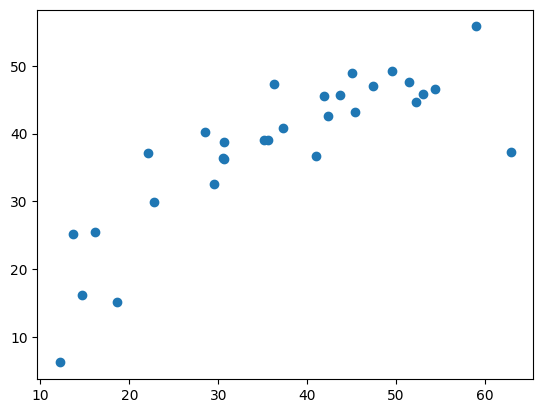

In [31]:
plt.scatter(ytest,pred)

<AxesSubplot: xlabel='price', ylabel='Count'>

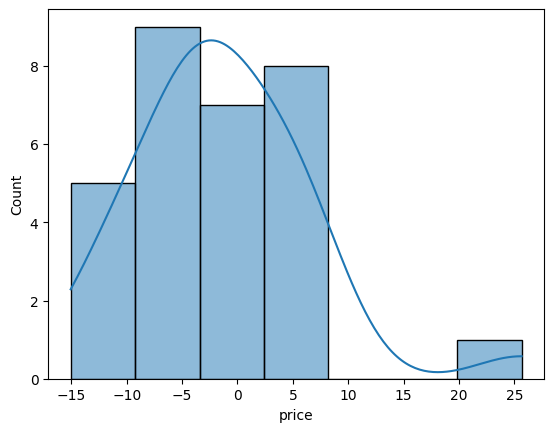

In [55]:
sns.histplot((ytest-pred), kde=True)

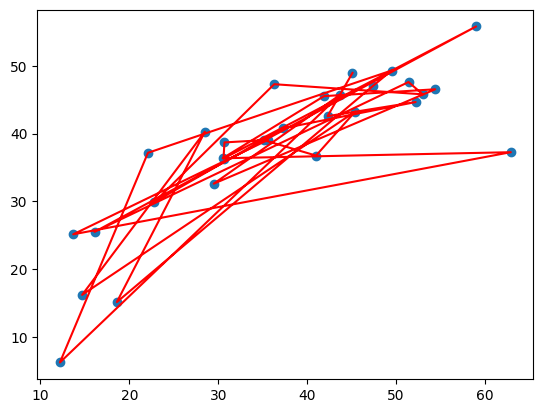

In [32]:
plt.scatter(ytest, pred)
plt.plot(ytest, pred, color='red')
#plt.scatter(x, y)

# MSE & MAE

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, 

In [78]:
scaled_mse = mean_squared_error(ytest,pred)
scaled_mse

63.104462142442436

In [79]:
scaled_rmse = np.sqrt(mse)
scaled_rmse

7.943831704060858

In [80]:
scaled_mae = mean_absolute_error(ytest, pred)
scaled_mae

6.072629259657887

# Unscaled

In [61]:
df2.head(5)

,No,date,age,distance,stores,latitude,longitude,price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [65]:
x2 = df2[['date', 'age', 'distance', 'stores', 'latitude', 'longitude']] 
x2.head(3)

,date,age,distance,stores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391


In [66]:
y2 = df2['price']
y2.head(3)

0    37.9
1    42.2
2    47.3
Name: price, dtype: float64

In [67]:
un_lr = LinearRegression()

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=30, random_state=42)

In [84]:
un_lr.fit(x_train, y_train)

LinearRegression()

In [85]:
pred2 = un_lr.predict(x_test)

In [86]:
pred2

array([47.97792579, 41.21610874, 44.2696322 , 40.17717504, 27.3926071 ,
       45.04829932, 44.49342915, 46.26483156, 23.85617436, 54.33561026,
       34.06137199, 36.55027253, 37.25419074, 23.49557872, 35.12640502,
       34.39773173, 43.32318616, 45.53801642, 29.98314364, 44.12904098,
        0.58217801, 34.94519411, 48.16388899, 45.61699222, 11.71036907,
       39.66390304, 12.79257892, 42.87853743, 34.96126447, 37.13244201])

In [87]:
unscaled_mse = mean_squared_error(y_test,pred2)
unscaled_mse

63.29888445561907

In [88]:
unscaled_rmse = np.sqrt(unscaled_mse)
unscaled_rmse

7.956059606087618

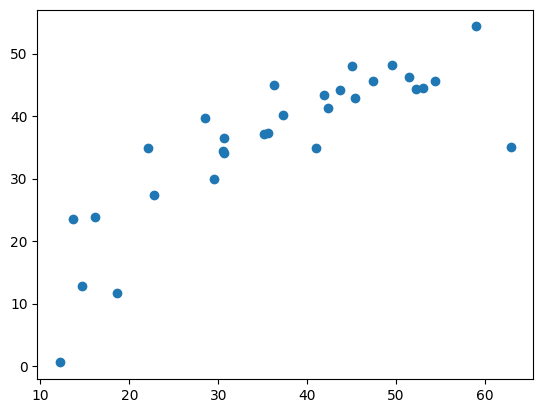

In [104]:
plt.scatter(y_test,pred2,)

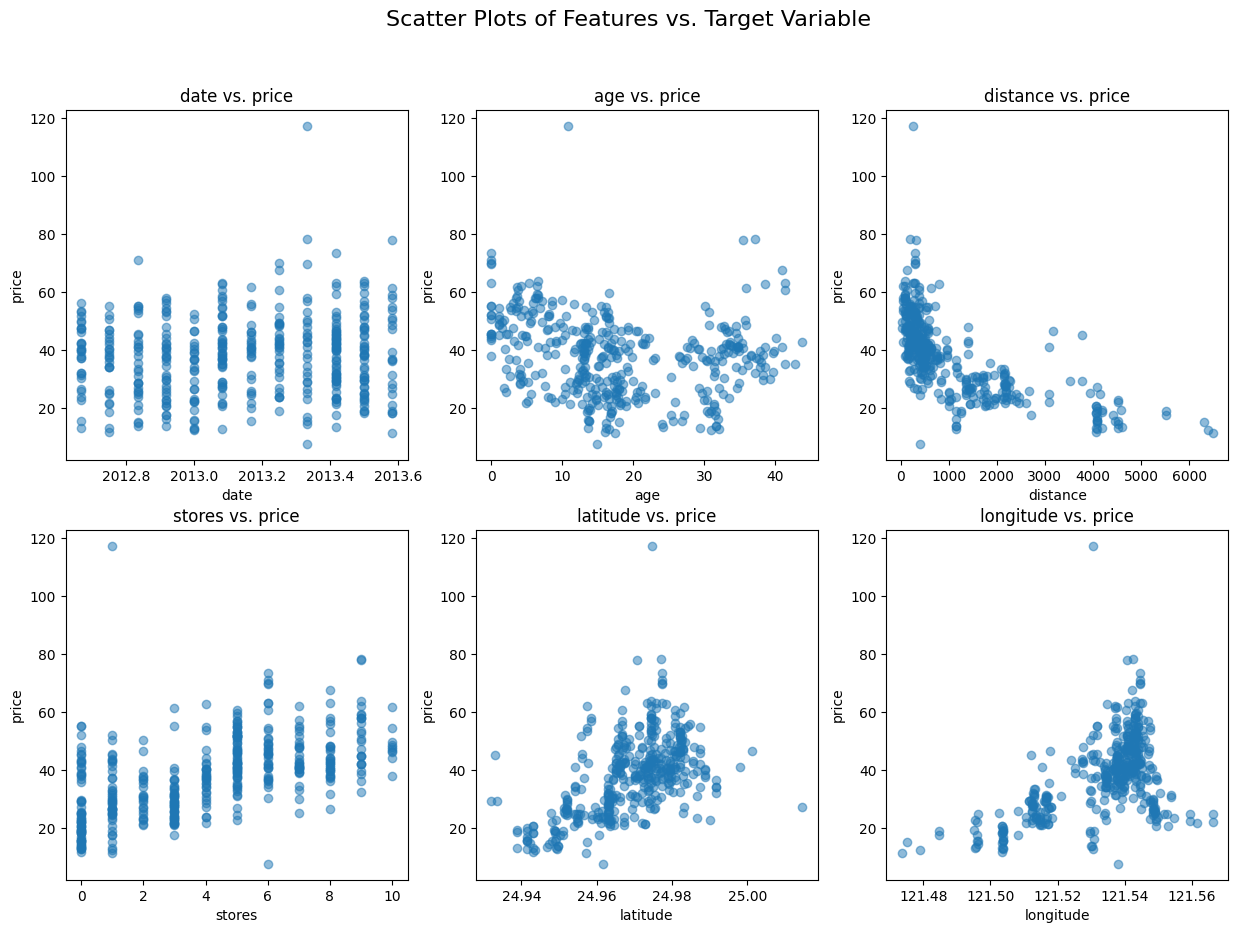

In [98]:
feature_columns = ['date', 'age', 'distance', 'stores', 'latitude', 'longitude']
target_column = 'price'


fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Scatter Plots of Features vs. Target Variable", fontsize=16)

# Create scatter plots for each feature vs. the target variable
for i, feature in enumerate(feature_columns):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(df2[feature], df2[target_column], alpha=0.5)
    axs[row, col].set_title(f"{feature} vs. {target_column}")
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel(target_column)